# Does the Brain’s E/I Balance Really Shape Long-Range Temporal

Correlations?

Lydia Sochan [](https://orcid.org/0000-0003-2247-6870) (School of Biomedical Engineering, The University of British Columbia, Vancouver, BC, Canada)  
Alexander Mark Weber [](https://orcid.org/0000-0001-7295-0775) (School of Biomedical Engineering, The University of British Columbia, Vancouver, BC, Canada, BC Children’s Hospital Research Institute, The University of British Columbia, Vancouver, BC, Canada, Pediatrics, The University of British Columbia, Vancouver, BC, Canada)

<sup>1</sup> School of Biomedical Engineering, The University of British Columbia, Vancouver, BC, Canada  
<sup>2</sup> BC Children’s Hospital Research Institute, The University of British Columbia, Vancouver, BC, Canada  
<sup>3</sup> Pediatrics, The University of British Columbia, Vancouver, BC, Canada

<sup>✉</sup> Correspondence: [Alexander Mark Weber \<aweber@bcchr.ca\>](mailto:aweber@bcchr.ca)

In [ ]:
# options
knitr::opts_chunk$set(
  # fig.width=8, fig.height=5,
  # out.width="50%",
  # fig.align="center",
  echo=FALSE,
  message=FALSE,
  warning=FALSE
  # cache=TRUE
)
set.seed(1234) # reproducible
options(knitr.kable.NA = '') # how kable handles NA
options(reticulate.repl.quiet = TRUE)

In [ ]:
#libraries
library(tidyverse) # ggplot2, dplyr, tidyr, readr, purrr, tibble, stringr, forcats

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Linking to ImageMagick 6.9.11.60
Enabled features: fontconfig, freetype, fftw, heic, lcms, pango, webp, x11
Disabled features: cairo, ghostscript, raw, rsvg
Using 32 threads

In [ ]:
load("notebooks/results.RData")

In [ ]:
format_p <- function(p, digits = 2) {
  if (p < 0.01) {
    "< 0.01"
  } else {
    format(round(p, digits), nsmall = digits)
  }
}

## Abstract

# Introduction

Thirty years ago, functional magnetic resonance imaging (fMRI) profoundly changed the world of MRI by allowing real-time analysis of pressing neuropsychological questions \[@ogawaMagneticResonanceImaging1990; @ogawaBrainMagneticResonance1990; @stephanShortHistoryCausal2012\]. While initially used to probe task-based responses, researchers have more recently developed an interest in studying brain function at rest, known as resting-state fMRI (rs-fMRI) \[@decoRestingBrainsNever2013\], i.e. to understand how brain dynamics at rest are related to neurological functioning as well as individual differences. A critical tool in analyzing these dynamics is the Hurst exponent (H) \[@campbellMonofractalAnalysisFunctional2022\], a measure of self-similarity derived from the blood-oxygen-dependent (BOLD) signal. H estimates the extent to which the BOLD signal displays long-term memory, where a higher value indicates a self-similar signal with long-term positive autocorrelations \[@campbellMonofractalAnalysisFunctional2022; @beggsBeingCriticalCriticality2012\]. Another way of understanding H is that a signal with high H is fractal: similar temporal signal fluctuations are observed, no matter the time scale \[@campbellMonofractalAnalysisFunctional2022\].

H has also emerged as a valuable tool in clinical research, capturing changes in BOLD signal dynamics across various neuropsychiatric conditions. In aging populations for instance, H has been found to be elevated \[@dongHurstExponentAnalysis2018; @winkAgeCholinergicEffects2006\]; this relationship has also been found in mild cognitive impairment and Alzheimer’s disease \[@maximFractionalGaussianNoise2005; @longBrainnetomeAtlasBased2018\]. Additionally, changes in H have been observed in conditions such as autism, mood disorders, and brain injury \[@laiShiftRandomnessBrain2010; @donaTemporalFractalAnalysis2017; @weiIdentifyingMajorDepressive2013; @jingIdentifyingCurrentRemitted2017; @donaFractalAnalysisBrain2017\]. These differences suggest H may reflect changes in global and local functioning.

Underlying these observations is the critical brain hypothesis, which posits that the brain operates at a critical point, a state where order and disorder are perfectly balanced to enable optimal information processing \[@decoRestingBrainsNever2013; @beggsBeingCriticalCriticality2012; @barangerChaosComplexityEntropy2000; @bassettUnderstandingComplexityHuman2011; @zimmernWhyBrainCriticality2020; @liangExcitationInhibitionBalance2024; @poilCriticalStateDynamicsAvalanches2012; @lombardiBalanceExcitationInhibition2017; @baumgartenCriticalExcitationinhibitionBalance2019; @bruiningMeasurementExcitationinhibitionRatio2020; @trakoshisIntrinsicExcitationinhibitionImbalance; @gaoInferringSynapticExcitation2017; @tianTheoreticalFoundationsStudying2022; @rubinovNeurobiologicallyRealisticDeterminants2011\]. When operating at a critical point, the brain is maximally sensitive to external stimuli, and can dynamically transition between ordered and disordered states to promote efficient cognitive processing \[@decoRestingBrainsNever2013; @beggsBeingCriticalCriticality2012; @tianTheoreticalFoundationsStudying2022; @rubinovNeurobiologicallyRealisticDeterminants2011\].Recent papers suggest the control parameter underlying the brain’s ability to transition between states is the excitatory-inhibitory (E/I) ratio, the balance of excitatory and inhibitory neural activity, often operationalized as the ratio of the primary excitatory-to-inhibitory neurotransmitters, i.e. glutamate-to-GABA ratio \[@liangExcitationInhibitionBalance2024; @lombardiBalanceExcitationInhibition2017; @baumgartenCriticalExcitationinhibitionBalance2019; @bruiningMeasurementExcitationinhibitionRatio2020; @trakoshisIntrinsicExcitationinhibitionImbalance; @gaoInferringSynapticExcitation2017\]. It is thought that E/I controls criticality by modulating the brain’s signal-to-noise ratio \[@liangExcitationInhibitionBalance2024; @rubensteinModelAutismIncreased2003\].

Besides the implications to the critical brain hypothesis, understanding if E/I is related to H may allow for easier estimation of excitatory and inhibitory neurotransmitters, as accurate E/I measurement is technically challenging \[@ajramContribution1HMagnetic2019\]. Magnetic resonance spectroscopy (MRS) is the only non-invasive method of measuring the ratio of glutamate (Glu; excitatory) to Gamma-aminobutyric acid (GABA; inhibitory) *in vivo* \[@stanleyFunctionalMagneticResonance2018\]. Unfortunately, it has both limited spatial and temporal resolution \[@gaoInferringSynapticExcitation2017; @ajramContribution1HMagnetic2019; @stanleyFunctionalMagneticResonance2018\]. Consequently, if H could serve as a proxy for E/I, it would be much easier to estimate E/I in conditions of interest such as autism, Alzheimer’s, and schizophrenia.

There are a handful of studies suggesting a link between H and E/I, however they are all either computational models or animal studies \[@liangExcitationInhibitionBalance2024; @poilCriticalStateDynamicsAvalanches2012; @lombardiBalanceExcitationInhibition2017; @baumgartenCriticalExcitationinhibitionBalance2019; @bruiningMeasurementExcitationinhibitionRatio2020; @trakoshisIntrinsicExcitationinhibitionImbalance; @gaoInferringSynapticExcitation2017\]. Moreover, their findings are inconsistent, with some reporting positive linear, negative linear, or U-shaped relationships between the two variables (see @tbl-lit). Thus, there is a need for further study, both to clarify the nature of a potential E/I-Hurst relationship, and also to confirm if this relationship indeed exists in the human brain. Therefore, the current study seeks to investigate the potential E/I-Hurst relationship in vivo, within the visual cortex during movie-watching and rest.

| Citation | Study Type | H Data Type | H Calculation Method | E/I Type | E/I-Hurst Relationship |
|------------|-------------|-------------|------------|-------------|-------------|
| Poil et al. (2012)@poilCriticalStateDynamicsAvalanches2012 | Computational with in-house simulated model | Neuronal avalanche size | Detrendend fluctuation analysis (DFA) | Structural: number of E-to-I neurons | Inverse U |
| Bruining et al. (2020)@bruiningMeasurementExcitationinhibitionRatio2020 | Computational with model by Poil et al. (2012); modified in-house | Neuronal oscillation amplitude | DFA | Structural: number of E-to-I synapses | Inverse U |
| Gao et al. (2017)@gaoInferringSynapticExcitation2017 | Computational; in vivo in rats and macaques | Local field potential (LFP) | PSD | Estimated from LFP | Positive linear |
| Lombardi et al. (2017)@lombardiBalanceExcitationInhibition2017 | Computational with in-house model | Neuronal avalanche size | PSD | Structural: number of E-to-I neurons | Negative linear |
| Trakoshis et al. (2020)@trakoshisIntrinsicExcitationinhibitionImbalance | Computational with simulated data; in vivo in mice | fMRI BOLD signal | Wavelet-based maximum likelihood method | E-to-I synaptic conductance | Positive linear |

# Methods

## Participants

Twenty-seven healthy adult participants were recruited to the study. One participant was not scanned due to feelings of claustrophobia while in the scanner. After our analysis and performing quality assurance (see below), a further seven participants were removed for having less than ideal MRI data quality, leaving nineteen final participants, between the ages of 21.3 and 53.4 (mean age ± sd: 30.1 ± 8.7 years; 9 males).

## Ethics Statement

Written informed consent was obtained from all participants. Ethics approval was granted by the Clinical Research Ethics Board at the University of British Columbia and BC Children’s & Women’s Hospital (H21-02686).

## Scanning Procedure

After two anatomical sequences were acquired, participants were instructed to visually fixate on a cross-hair for 24 minutes. During this period, an fMRI, MEGA-PRESS, and sLASER sequence were acquired (see @fig-method A and @sec-mriacq). Next, participants were instructed to watch a nature documetnary (Our Planet (2019), Episode 3, “Jungles” @cordeyJungles2019) for 24 minutes. During this period, another set of fMRI, sLASER, and MEGA-PRESS sequences were acquired. See @fig-method B for a visual representation of the scanning protocol. Total scan duration was approximately 1 hour. All participants followed the same order of rest than movie, and all participants saw the same movie segment, beginning at the same time during the scan.

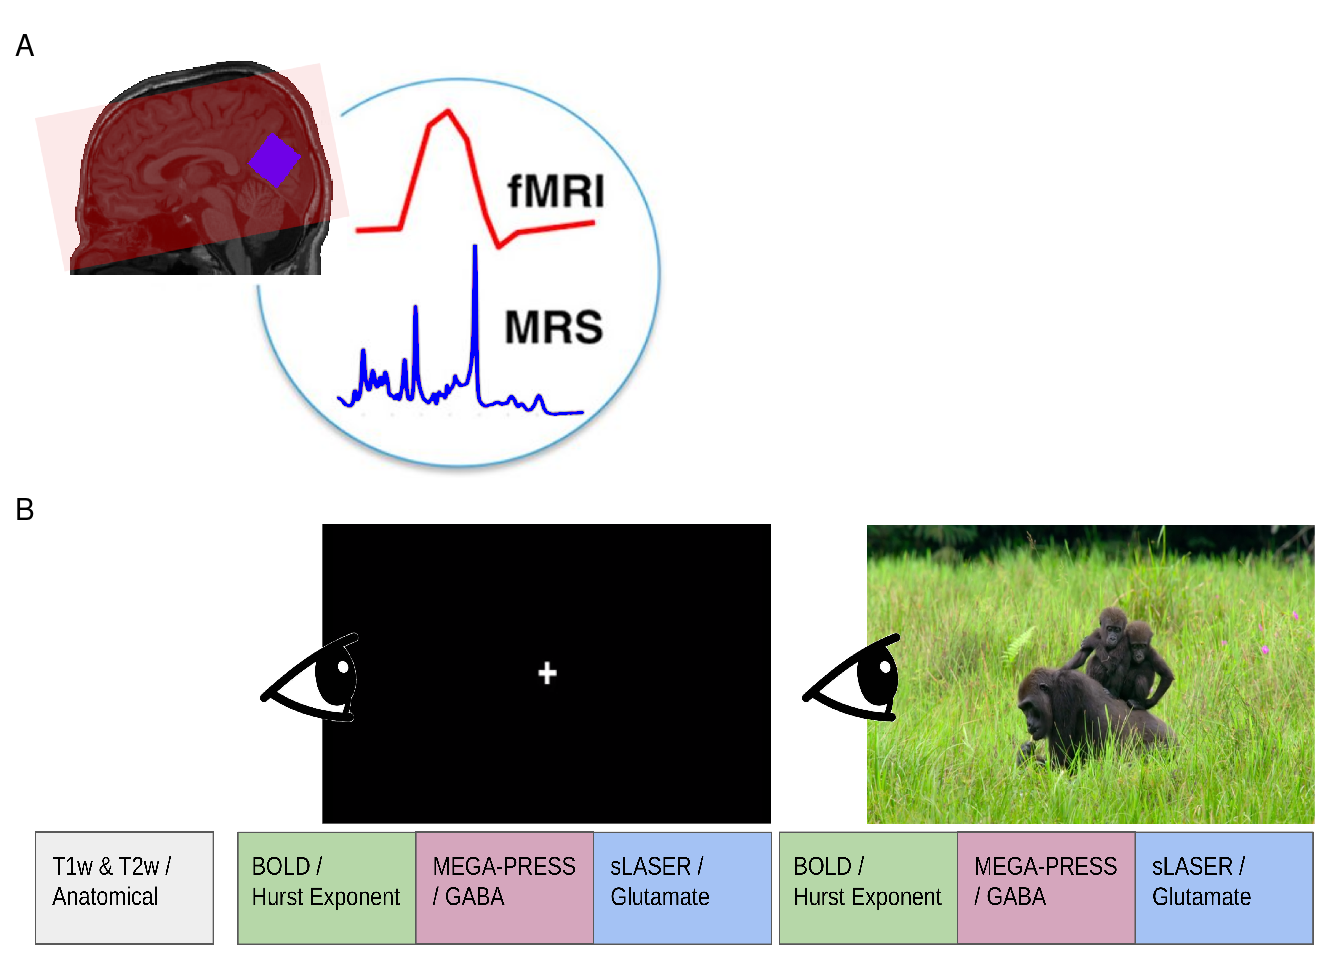

In [ ]:
fmrimrs <- image_read('../Figures/StudyDesign/studydesign_fmri_mrs.png')
fmrimrs_dim <- image_info(fmrimrs)

fmrimrs <- ggplot() + background_image(fmrimrs) + theme_void() +
  theme(aspect.ratio = fmrimrs_dim$height / fmrimrs_dim$width)
studydesign <- image_read('../Figures/StudyDesign/StudyDesign.png')
studydesign <- ggplot() + background_image(studydesign) + theme_void()
p <- (fmrimrs + plot_spacer()) / studydesign
p + plot_annotation(tag_levels = 'A') & theme(plot.tag = element_text(size = 11))

## Acquisition Details

Scans were performed at BC Children’s Hospital MRI Research Facility on a 3.0 Tesla GE Discovery MR750 scanner (scanner software version: DV26.0_R03) with a Nova Medical 32 channel head coil. Participants changed into scrubs and were screened by an MRI technologist. Participants were given wax earplugs and a fiducial was placed on their left temple. Participants were provided with an audio headset and blanket once lying down on the scanner bed. Since visual stimuli were to be rear-projected, position and angle of mirror above patient eyes was adjusted for optimal movie viewing.

The following MRI scans were acquired. A 3D T1-weighted sagittal fast spoiled gradient echo (FSPGR) sequence; a 3D T2-weighted sagittal CUBE; a 2D echo-planar imaging (EPI) multi-echo gradient-echo fMRI sequence; a semi-LASER (sLASER) sequence; and a MEGA-PRESS sequence. Details are listed in @tbl-mriacq.

| Sequence | TE (ms) | TR (ms) | Flip Angle | FOV | Slice Thickness (mm) | In-Plane Resolution (mm²) | Other Parameters |
|-------------|-------|------|------|-------|---------|------------|---------------|
| **3D T1-weighted FSPGR** | 2.176 | 7.216 | 12 | 256 × 256 | 0.9 | 0.9375 × 0.9375 | \- |
| **3D T2-weighted CUBE** | 75.242 | 2,504.0 | 90 | 256 x 256 | 0.9 | 0.9375 × 0.9375 | \- |
| **2D EPI Multi-Echo fMRI** | 12.2, 35.352, 58.504 | 1,500 | 52 | 64 x 64 | 3.6 | 3.5938 × 3.5938 | Acceleration factor = 6 |
| **sLASER** | 35 | 2,000 | 90 | \- | 28.0 | 28.0 x 28.0 | \- |
| **MEGA-PRESS** | 68 | 1,800 | 90 | \- | 28.0 | 28.0 x 28.0 | \- |

For both MRS sequences, the voxel size was set to 2.8 x 2.8 x 2.8 cm<sup>3</sup>. MRS voxels were rotated and placed in the occipital lobe, aligned along the calcarine fissure. Finally, blip-up and blip-down spin-echo versions of the fMRI sequence were acquired at the end to estimate the B0 non-uniformity map for fMRI phase distortion correction.

## Image Processing

Our full image processing pipeline has been can be accessed from our Github account page: [github.com/WeberLab/EI_Hurst_Analysis](https://github.com/WeberLab/EI_Hurst_Analysis)

Images were downloaded offline from the scanner in raw Digital Imaging and Communications in Medicine (DICOM) format. DICOM files were then converted to Neuroimaging Informatics Technology Initiative (NIfTI) using Chris Rorden’s `dcm2niix` \[@liFirstStepNeuroimaging2016\] (v1.0.20211006) and then to Brain Imaging Data Structure (BIDS) \[@gorgolewskiBrainImagingData2016\] format using `dcm2bids` \[@boreDcm2Bids2023\] (v2.1.6).

### Structural Images

The T1w image was corrected for intensity non-uniformity with `N4BiasFieldCorrection` \[@tustisonN4ITKImprovedN32010\] and distributed using `ANTs` \[@avantsSymmetricDiffeomorphicImage2008\] (v2.3.335) to be used as a T1w-reference for the rest of the workflow. The T1w-reference was skull-stripped using a `Nipype` \[@gorgolewskiNipypeFlexibleLightweight2016\] implementation of `antsBrainExtraction.sh` from `ANTs`; `OASIS30ANTs` was used as a target template. `Fast` \[@zhangSegmentationBrainMR2001\] (`FSL` \[@smithAdvancesFunctionalStructural2004\] v.6.0.5.1:57b01774, RRID: SCR_002823) was used for brain tissue segmentation into cerebrospinal fluid (CSF), white matter (WM), and gray matter (GM). Brain surfaces were reconstructed with `recon-all` \[@daleCorticalSurfacebasedAnalysis1999\] (`FreeSurfer` \[@daleCorticalSurfacebasedAnalysis1999\] 7.3.2, RRID: SCR_001847). The previously-estimated brain mask was refined with `Mindboggle` \[@kleinMindbogglingMorphometryHuman2017\] (RRID:SCR_002438) to reconcile ANTs-derived and FreeSurfer-derived segmentations of cortical GM. `AntsRegistration` \[@avantsSymmetricDiffeomorphicImage2008\] (`ANTs` 2.3.3) was used to perform volume-based spatial normalization to two standard spaces: MNI152NLin2009cAsym and MNI152NLin6Asym. Normalization used brain-extracted versions of both T1w reference and T1w template.

### fMRI

Using `fMRIPrep` \[@estebanFMRIPrepRobustPreprocessing2019\], the shortest echo of the BOLD run was used to generate a reference volume (both skull-stripped and skull-included). Head-motion parameters with respect to the BOLD reference (transformation matrices as well as six corresponding rotation and translation parameters) were estimated before spatiotemporal filtering using `mcflirt` \[@jenkinsonImprovedOptimizationRobust2002\] (`FSL` v6.0.5.1:57b01774). The fieldmap was aligned with rigid registration to the target EPI reference run. Field coefficients were mapped to the reference EPI using the transform. BOLD runs were slice-time corrected to 643 ms (half of slice acquisitio range of 0-1290 ms) using `3dTshift` from `AFNI` \[@coxAFNISoftwareAnalysis1996\] (RRIS: SCR_005927). To estimate T2\* map from preprocessed EPI echoes, a voxel-wise fitting was performed by fitting the maximum number of echoes with reliable echoes in a particular voxel to a monoexponential signal decay model with nonlinear regression. Initial values were T2*/S0 estimates from a log-linear regression fit. This calculated T2* map was then used to optimally combine preprocessed BOLD across echoes using the method by Posse et al. (1999) \[@posseEnhancementBOLDcontrastSensitivity1999\]. The generated BOLD reference was then co-registered (6 degrees of freedom) to the T1w reference with `bbregister` (`FreeSurfer` \[@daleCorticalSurfacebasedAnalysis1999\]) using boundary-based registration. First, a reference volume and its skull-stripped equivalent were generated with `fMRIPrep`. Confounding time series were calculated from preprocessed BOLD: framewise displacement (FD), DVARS, and three region-wise global signals. `Tedana` \[@dupreTEdependentAnalysisMultiecho2021\] was then used to denoise the data by decomposing the multi-echo BOLD data via principal component analysis (PCA) and independent component analysis (ICA). The resulting components are automatically analyzed to determine whether they are TE-dependent or -independent. TE-dependent components were classified as BOLD, while TE-independent components were classified as non-BOLD and were discarded as part of data cleaning.

Participants were excluded from further ananlysis if their mean FD was \> 0.15 mm.

## MRS

sLASER data were processed and fit to a spectrum using `Osprey` \[@oeltzschnerOspreyOpenSourceProcessing2020\] (v2.4.0). Full width half-maximum (FWHM) of the single-Lorentzian fit of the N-acetylaspartate (NAA) peak were calculated for quality assurance purposes. The MRS voxel was co-registered to T1w reference image and segmented by SPM12 \[@fristonStatisticalParametricMapping2007\] into CSF, GM, and WM. Metabolites were water-scaled as well as tissue- and relaxation-corrected by the Gasparovic et al. (2006) method \[@gasparovicUseTissueWater2006\]. Processed (non-fitted) data from `Osprey` was also fed to `LCModel` \[@provencherAutomaticQuantitationLocalized2001\] (v6.1) for fitting. Cramer-Rao lower bounds (CRLBs) were calculated from LCModel fit. `Osprey` estimates were used for further analysis. Glutamate is challenging to capture due to its signal overlaps with other metabolites \[@pasantaFunctionalMRSStudies2023\]. In particular, Glu shares a similar chemical structure with glutamine (Gln) which causes the spectral features of Glu to be contaminated with Gln \[@ramadanGlutamateGlutamineReview2013\]. As a result, we decided to report Glx values, which co-reports Glu and Gln to avoid errors in spectral assignment, especially since it is controversial whether Glu can reliably be separated from Gln at 3T \[@pasantaFunctionalMRSStudies2023; @ramadanGlutamateGlutamineReview2013\]. We henceforth refer to Glu as either Glx or glutamate. <!-- Does this make sense? -->

MEGA-PRESS data were processed and fit with `Osprey` and `LCModel` as previously described (see Figure 5). Data were also fit with `Gannet` (v3.3.0); they were relaxation-, tissue- and alpha-corrected using the Harris et al. (2015) method \[@harrisSpectralEditingMeasurementsGABA2015\]. `Osprey` values were ultimately used for further analysis. Due to the J-editing sequence of MEGA-PRESS, a challenge of GABA quantification is macromolecule quantification \[@harrisSpectralEditingMeasurementsGABA2015\]. As a result, we report GABA+, a measure which co-reports GABA with macromolecules. Macromolecules (MM) are expected to account for approximately 45% of the GABA+ signal \[@harrisSpectralEditingMeasurementsGABA2015\]. While a macromolecule-suppressed estimate of GABA seems ideal, a recent 25-site and multi-vendor study conducted at 3T found that GABA+ showed much lower coefficient of variation than MM-suppressed GABA, meaning that GABA+ is more consistent across research sites and MRI vendors (i.e., Philips, GE, Siemens) \[@mikkelsenBigGABAII2019\]. Moreover, GABA+ showed greater reliability for both creatine-referenced and water-suppressed estimates \[@mikkelsenBigGABAEdited2017; @mikkelsenBigGABAII2019\]. MM-supressed GABA and GABA+ estimates are also correlated, albeit weakly- to moderately-so \[@harrisSpectralEditingMeasurementsGABA2015; @mikkelsenBigGABAII2019; @mikkelsenBigGABAEdited2017\]. Consequently, we report GABA+ (henceforth referred to as GABA) to allow for easier comparison of our results to other studies as well as reproducibility.

Basis sets were created using `MRSCloud` \[@huiMRSCloudCloudbasedMRS2022; @moriMRICloudDeliveringHighThroughput2016\]. For sLASER, ‘localization’ was set to ‘sLASER’, ‘vendor’ to ‘GE’, ‘editing’ to ‘UnEdited’, and ‘TE’ to 35. For MEGA-PRESS, ‘localization’ was set to ‘PRESS’, ‘editing’ to ‘MEGA’, ‘TE’ to 68, ‘edit on’ to ‘1.9’, ‘edit off’ to ‘7.5’, and ‘pulse duration’ to ‘14’. Metabolites included for both basis sets were: Asc, Asp, Cr, CrCH2, EA, GABA, GPC, GSH, Gln, Glu, Gly, H2O, Lac, NAA, NAAG, PCh, PCr, PE, Ser, Tau, mI, and sI. Excitatory-inhibitory ratio (E/I) was calculated as \[Glx in i.u.\]/\[GABA+ in i.u.\], a common practice to report E/I using MRS \[@rideauxNoBalanceGlutamate+glutamine2021\].

Participants were excluded from further analysis if any of their MRS scans had FWHM \> 10. Originally we intended to calculate, report and analyze MRS as tissue-corrected quantitative values. However, the `Osprey` software was reporting Glx values that were an order of magnitude larger than reported Glx values in the literature. Despite several attempts, we were unable to locate the source of this error. Therefore we decided to use Glx/Cr and GABA+/Cr values to be safe.

## Hurst Exponent Calculation

Hurst exponent was calculated from the power spectrum density (PSD) of the BOLD signal. A log-log plot was used, where log power was plotted against log frequency; generally, if a log-log plot results in a linear relationship, it is assumed that the mean slope of this line represents the power-law exponent \[@zimmernWhyBrainCriticality2020\]. A PSD shows the distribution of signal variance (‘power’) across frequencies. Complex signals are classified into two categories: fractional Gaussian noise (fGn) and fractional Brownian motion (fBm) \[@duffPowerSpectralDensity2008; @ekeFractalCharacterizationComplexity2002\]. The former is a stationary signal (i.e., does not vary over time), while the latter is non-stationary with stationary increments \[@ekeFractalCharacterizationComplexity2002\]. Most physiological signals consist of fBm, but fMRI BOLD is typically conceptualized as fGn once motion-corrected; otherwise put, unprocessed BOLD signal is initially fBm which is converted to fGn with appropriate processing \[@bullmoreWaveletsFunctionalMagnetic2004\]. fBm and fGn require distinct H calculation methods \[@ekeFractalCharacterizationComplexity2002\]. PSD was estimated using Welch’s method \[@welchUseFastFourier1967\] from the Python `Scipy.Signal` library \[@virtanenSciPy10Fundamental2020\]. Data were divided into 8 windows of 50% overlap and averaged. The spectral index, , was calculated from the full frequency spectrum. The spectral index was then converted to H using the following equation \[@ekeFractalCharacterizationComplexity2002; @schaeferComparativeAnalysisSpectral2014\]:

$$
H = \frac{1 + \beta}{2}
$$

Since it cannot be assumed that all fBm is removed from the signal, we use the concept of ‘extended Hurst’ (H’) in this study: for 0 \< H \< 1, the signal is understood as fGn, while for 1 \< H \< 2, the signal is assumed to be fBm \[@campbellFractalBasedAnalysisFMRI2022\]. More generally, it is also assumed that when 0.5 \< H \< 1.5, the signal displays 1/f behaviour \[@zimmernWhyBrainCriticality2020\].H was calculated for all voxels in the brain of each subject. A brain mask was then applied which included only GM and the region of the MRS voxel in the visual cortex. H was averaged across the brain mask area, using only non-zero voxels.

## Statistics

All statistical analyses were performed using `R` \[@rcoreteamLanguageEnvironmentStatistical2021\] and `RStudio` (v2023.06.0+421). Glutamate, GABA, E/I ratio, and H were compared between rest and movie conditions using paired Student’s t-tests \[@studentProbableErrorMean1908\]. Glutamate, GABA, and E/I ratio were tested for correlation with H using Pearson’s method \[@freedmanStatistics2007\].

# Results

## Participant Demographics

Twenty-seven participants were originally recruited for the study. Twenty-six of these participants were successfully scanned, but one participant experienced anxiety and chose not to continue. Of the remaining 26 participants, 19 were included in the final analysis: two were removed due to low MRS quality (FWHM \> 10) and five were removed due to low fMRI quality (mean FD \> 0.15 mm). See @fig-partflow.

![**Flowchart of participant, recruitment, scanning and exclusion**. The number of participants at each stage is indicated within each node. Participants were excluded based on MRS FWHM and fMRI Mean FD thresholds, resulting in 19 participants included in the final analysis](attachment:./images/ParticipantFlow.png){#fig-partflow }

The final study sample included 9 males and 10 females between ages 21.3 and 53.4, with a mean age and standard deviation of 30.1 ± 8.7 years.

## Data Quality

### MRS

After exclusion, FWHM (mean ± sd) at rest in sLASER and MEGAPRESS were 8.52 ± 0.7 and 7.02 ± 0.7, respectively. During movie watching, FWHM in sLASER and MEGAPRESS were 8.37 ± 0.65 and 6.98 ± 0.86.

Glx and GABA+ were tested for associations with FWHM values during rest and movie watching. Glx during rest was found to be negatively correlated with FWHM (r = -0.53, p = 0.02). No other correlations were significant.

An average of all MRS voxel placements can be seen in @fig-mrsquality A, and a sample of the `Osprey` sLASER and MEGAPRESS spectrum fits at rest can be seen in @fig-mrsquality B and C, respectively.
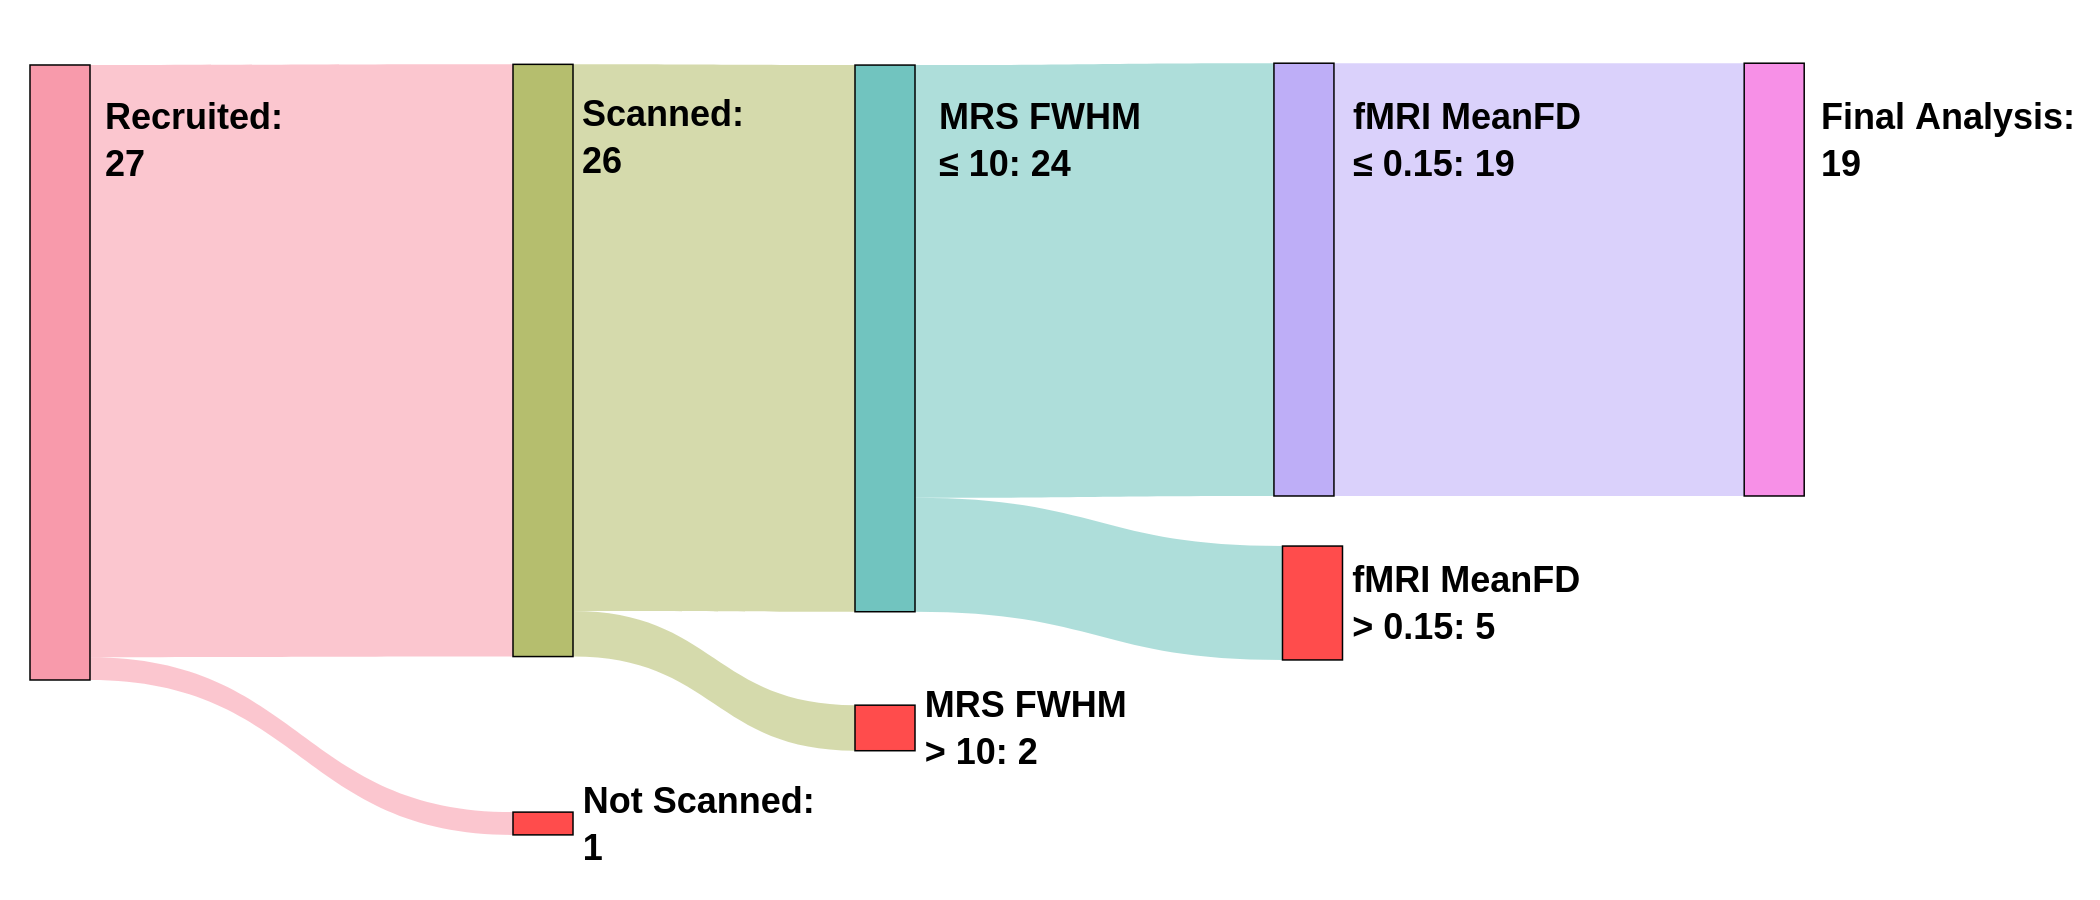

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'

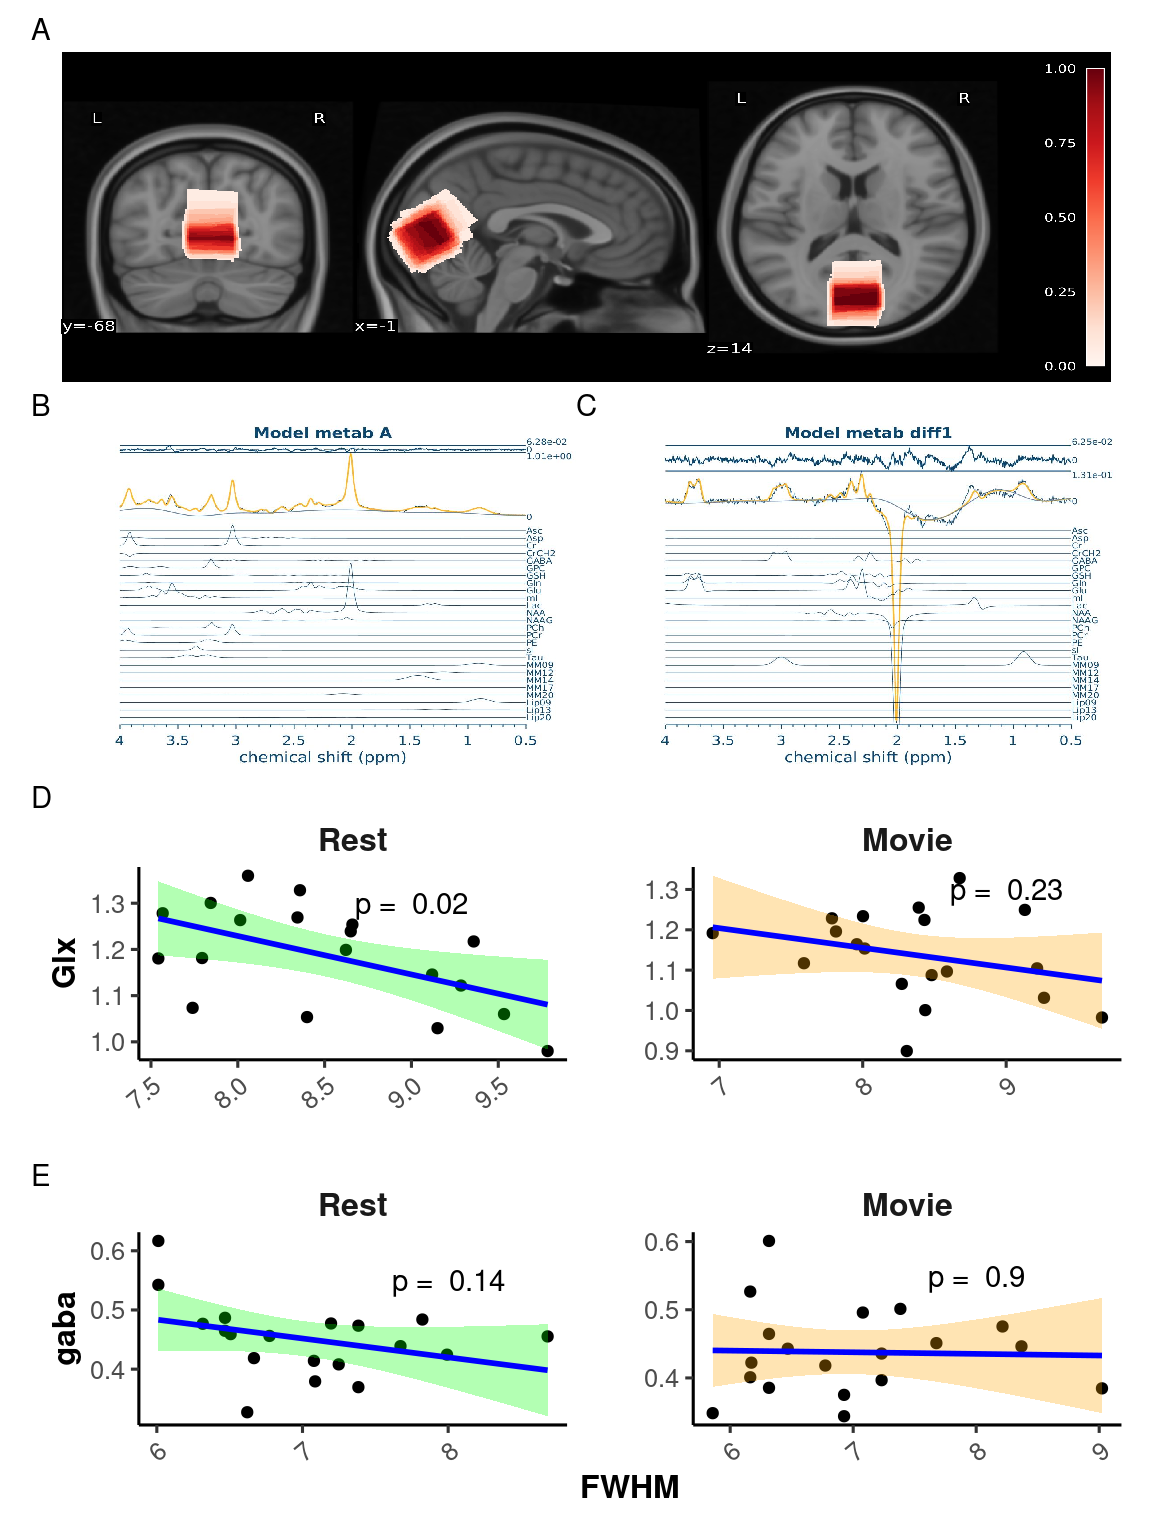

In [ ]:
layout <- "
  AAAA
  BBCC
  DDDD
  DDDD
  "

mrsvoxel <- image_read("./images/MRSVoxelAverage.png") # From Figures.ipynb
mrsvoxel <- ggplot() + background_image(mrsvoxel) + theme_void()

ospreyslaser <- image_read("../Data_from_BCCHRI/derivatives/slaser/sub-Pilot10/rest/Reports/reportFigures/sub-Pilot10/sub-Pilot10_metab_A_model.jpg")
ospreyslaser_dim <- image_info(ospreyslaser)
ospreyslaser <- ggplot() + background_image(ospreyslaser) + theme_void() #+
  # theme(aspect.ratio = ospreyslaser_dim$height / ospreyslaser_dim$width)

ospreymegapress <- image_read("../Data_from_BCCHRI/derivatives/megapress/sub-Pilot10/rest_osprey/Reports/reportFigures/sub-Pilot10/sub-Pilot10_metab_diff1_model.jpg")
ospreymegapress_dim <- image_info(ospreymegapress)
ospreymegapress <- ggplot() + background_image(ospreymegapress) + theme_void() #+
  # theme(aspect.ratio = ospreymegapress_dim$height / ospreymegapress_dim$width)

# p1 <- free(mrsvoxel) + ospreyslaser + ospreymegapress + glu_FWHM_plot
p1 <- free(mrsvoxel) + free(ospreyslaser) + free(ospreymegapress) + free(gluandgaba_FWHM_plot) +
  plot_layout(design = layout)
p1 + plot_annotation(tag_levels = "A") & theme(plot.tag = element_text(size = 11))

### fMRI and Hurst

A sample of the combined grey-matter and MRS voxel mask used to average H values can be seen in @fig-hurstsamp A, along with a sample Hurst exponent map in @fig-hurstsamp B, and sample fits for H calculation during rest in @fig-hurstsamp C.

Mean FD was not correlated with H during rest (r = -0.33, p = 0.16 but was moderately negatively correlated with H during movie watching (r = -0.50, p = 0.03; see @fig-hurstsamp D).

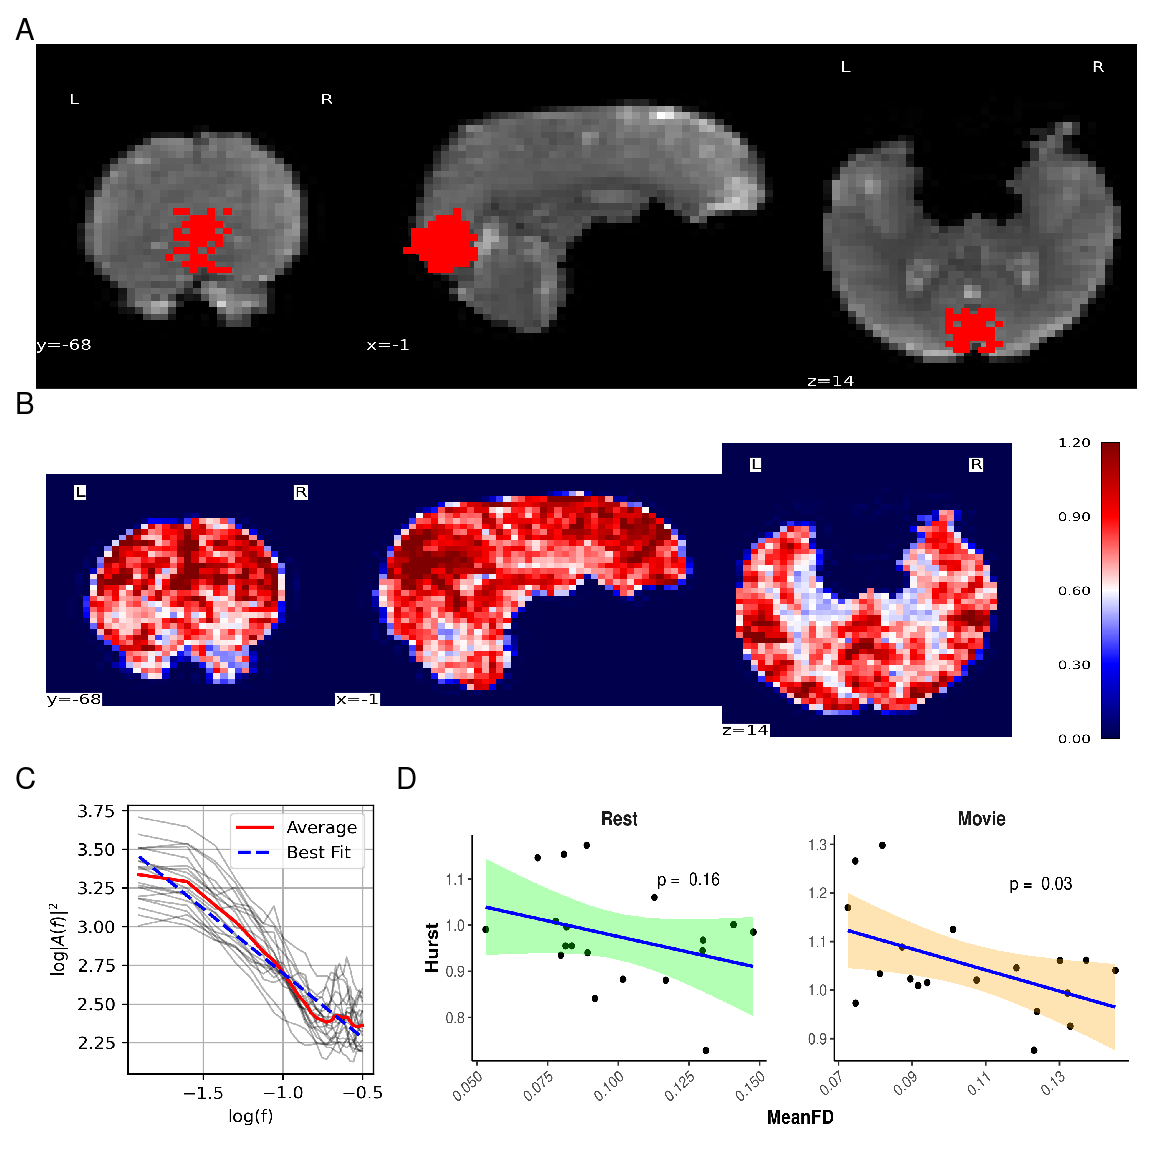

In [ ]:
# layout="
#   AAAAAAAAA#
#   BBBBBBBBBB
#   CCCCDDDDDD
#   "
layout = "
  AAA
  BBB
  CDD
  "

fmrimask <- image_read("./images/SampleMask.png")
fmrimask_dim <- image_info(fmrimask)
fmrimask <- ggplot() + background_image(fmrimask) + theme_void() #+ theme(aspect.ratio = fmrimask_dim$height / fmrimask_dim$width)

hurstsamp <- image_read("./images/HurstSample.png")
hurstsamp_dim <- image_info(hurstsamp)
hurstsamp <- ggplot() + background_image(hurstsamp) + theme_void() #+ 
  #theme(aspect.ratio = hurstsamp_dim$height / hurstsamp_dim$width)
  #coord_fixed()

psdplot <- image_read("./images/PSDs.png")
psdplot_dim <- image_info(psdplot)
psdplot <- ggplot() + background_image(psdplot) + theme_void() #+ theme(aspect.ratio = psdplot_dim$height / psdplot_dim$width)

meanfd_hurst <- image_read("./notebooks/MeanFD_Hurst_Plot.png")
meanfd_hurst_dim <- image_info(meanfd_hurst)
meanfd_hurst <- ggplot() + background_image(meanfd_hurst) + theme_void() #+ theme(aspect.ratio = meanfd_hurst_dim$height / meanfd_hurst_dim$width)

fmrimask + hurstsamp + psdplot + meanfd_hurst +
  plot_layout(design = layout) +
  plot_annotation(tag_levels = 'A') & theme(plot.tag = element_text(size = 11))

## Paired Student’s T Tests

Mean ± sd of metabolites, E/I, and H during rest and movie are reported in @tbl-results. Neither Glx nor GAB+ were different between movie and rest conditions (@fig-results A & B, respectively). E/I ratio did not change between conditions either (@fig-results C). H was found to be greater during movie watching than rest (@fig-results D).

|                 | Rest        | Movie       | p-value |
|-----------------|-------------|-------------|---------|
| **Glx / tCr**   | 1.19 ± 0.11 | 1.14 ± 0.11 | 0.09    |
| **GABA+ / tCr** | 0.45 ± 0.06 | 0.44 ± 0.06 | 0.50    |
| **E/I Ratio**   | 2.68 ± 0.49 | 2.65 ± 0.45 | 0.82    |
| **H**           | 0.98 ± 0.98 | 1.05 ± 1.05 | \< 0.01 |

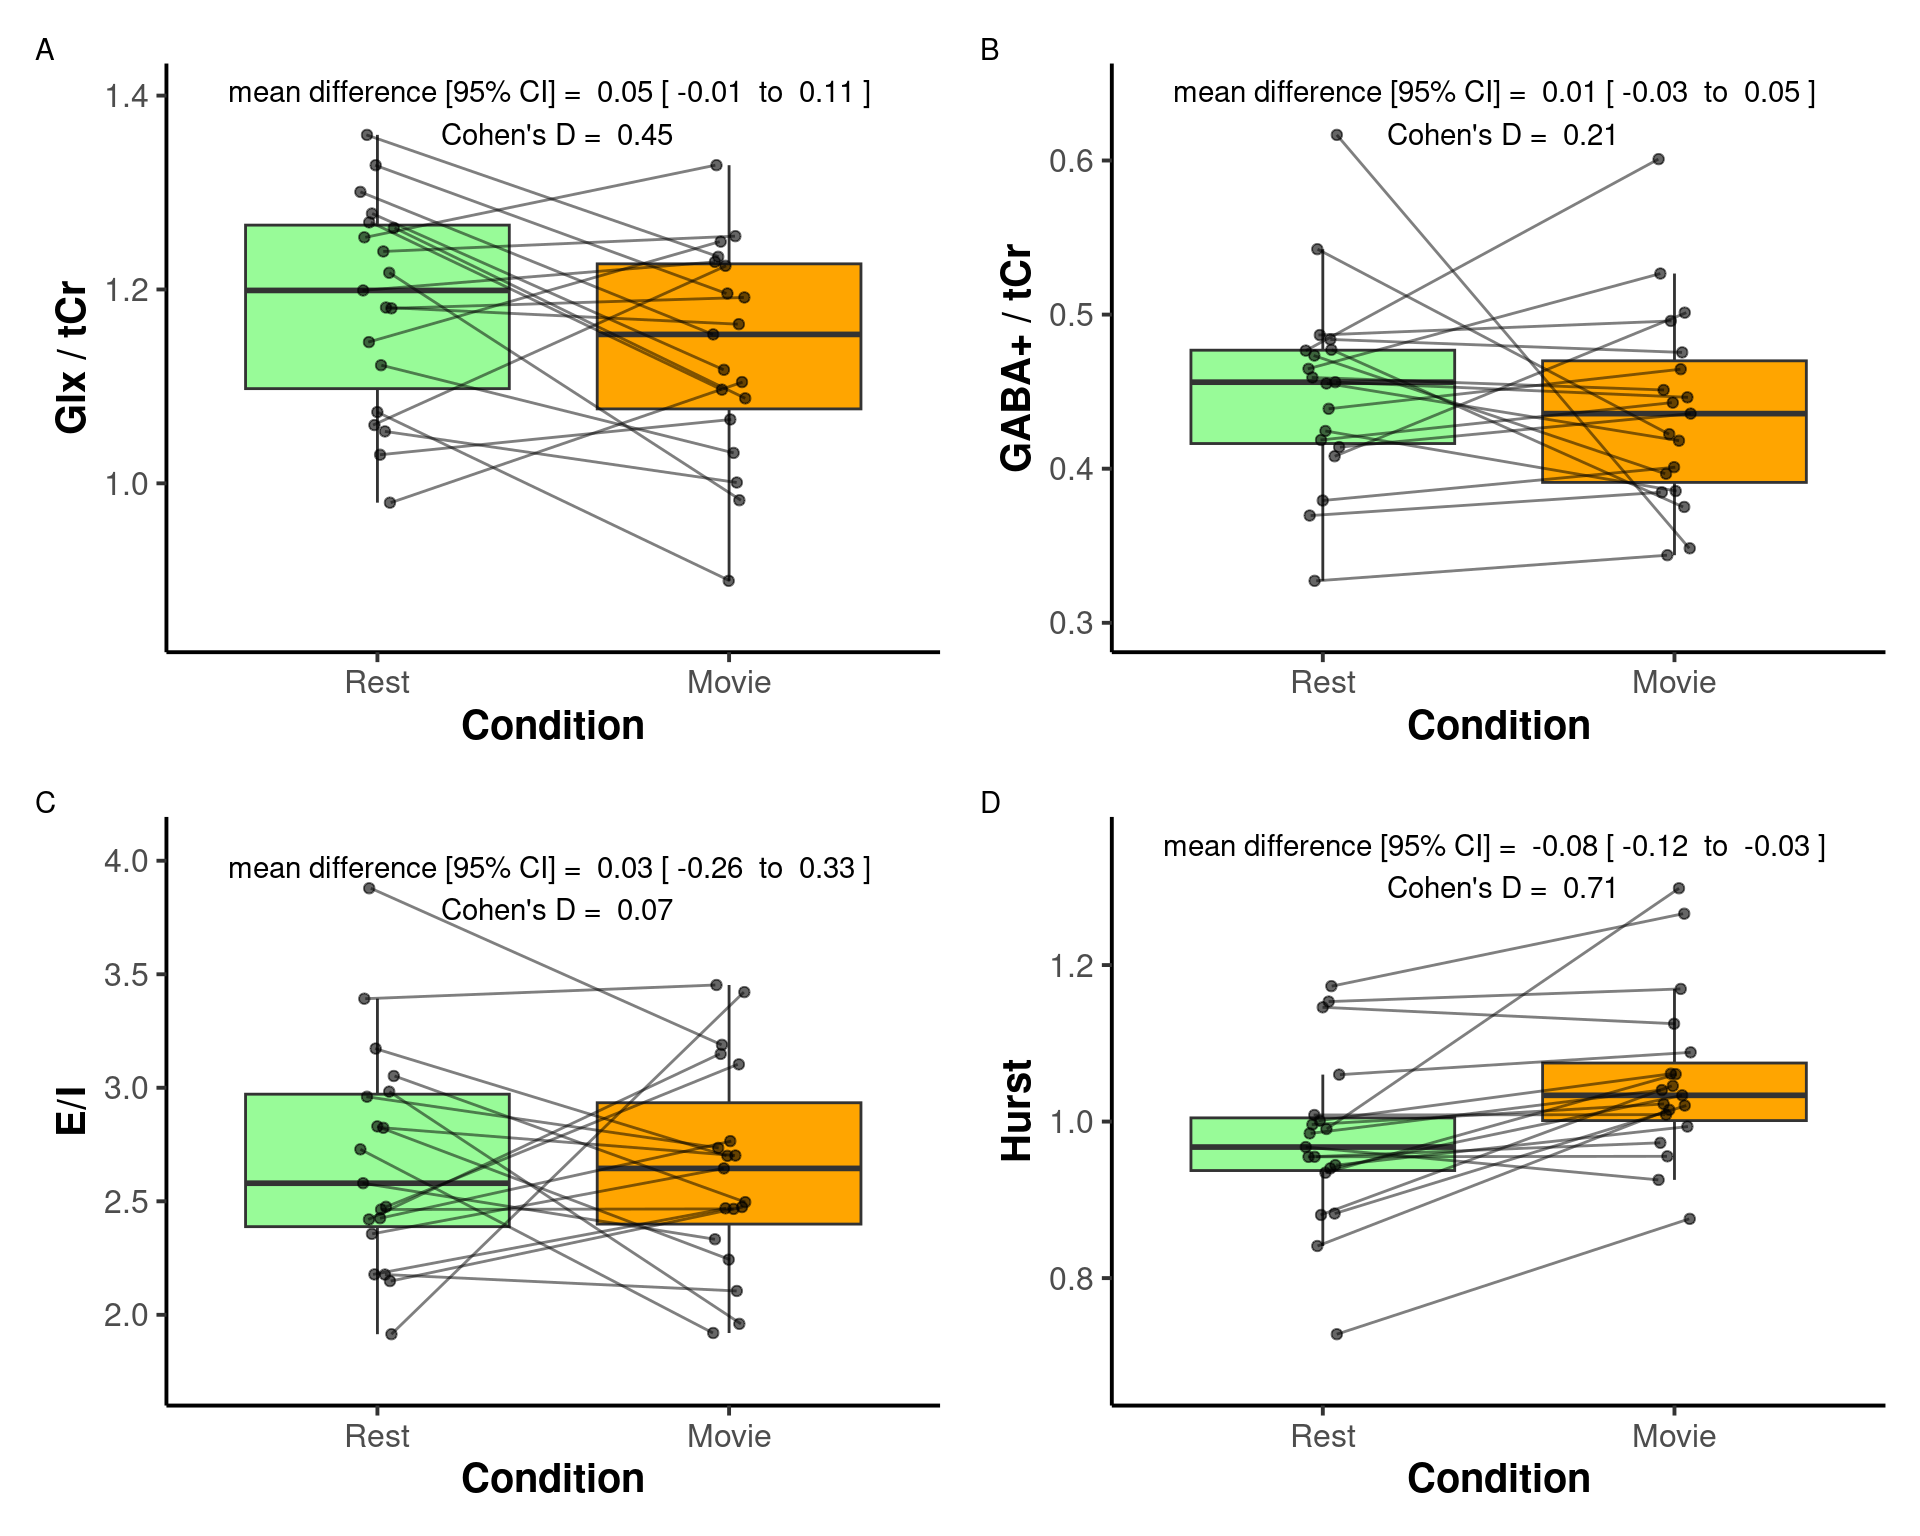

In [ ]:
layout <- "
  AABB
  CCDD
  "

glu_boxplot + gaba_boxplot + ei_boxplot + hurst_boxplot + plot_layout(design = layout) + plot_annotation(tag_levels = 'A') & theme(plot.tag = element_text(size = 11))

## Correlations

H was not found to correlate with Glx, GABA+, or E/I, during rest or movie (@fig-correlations).

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'

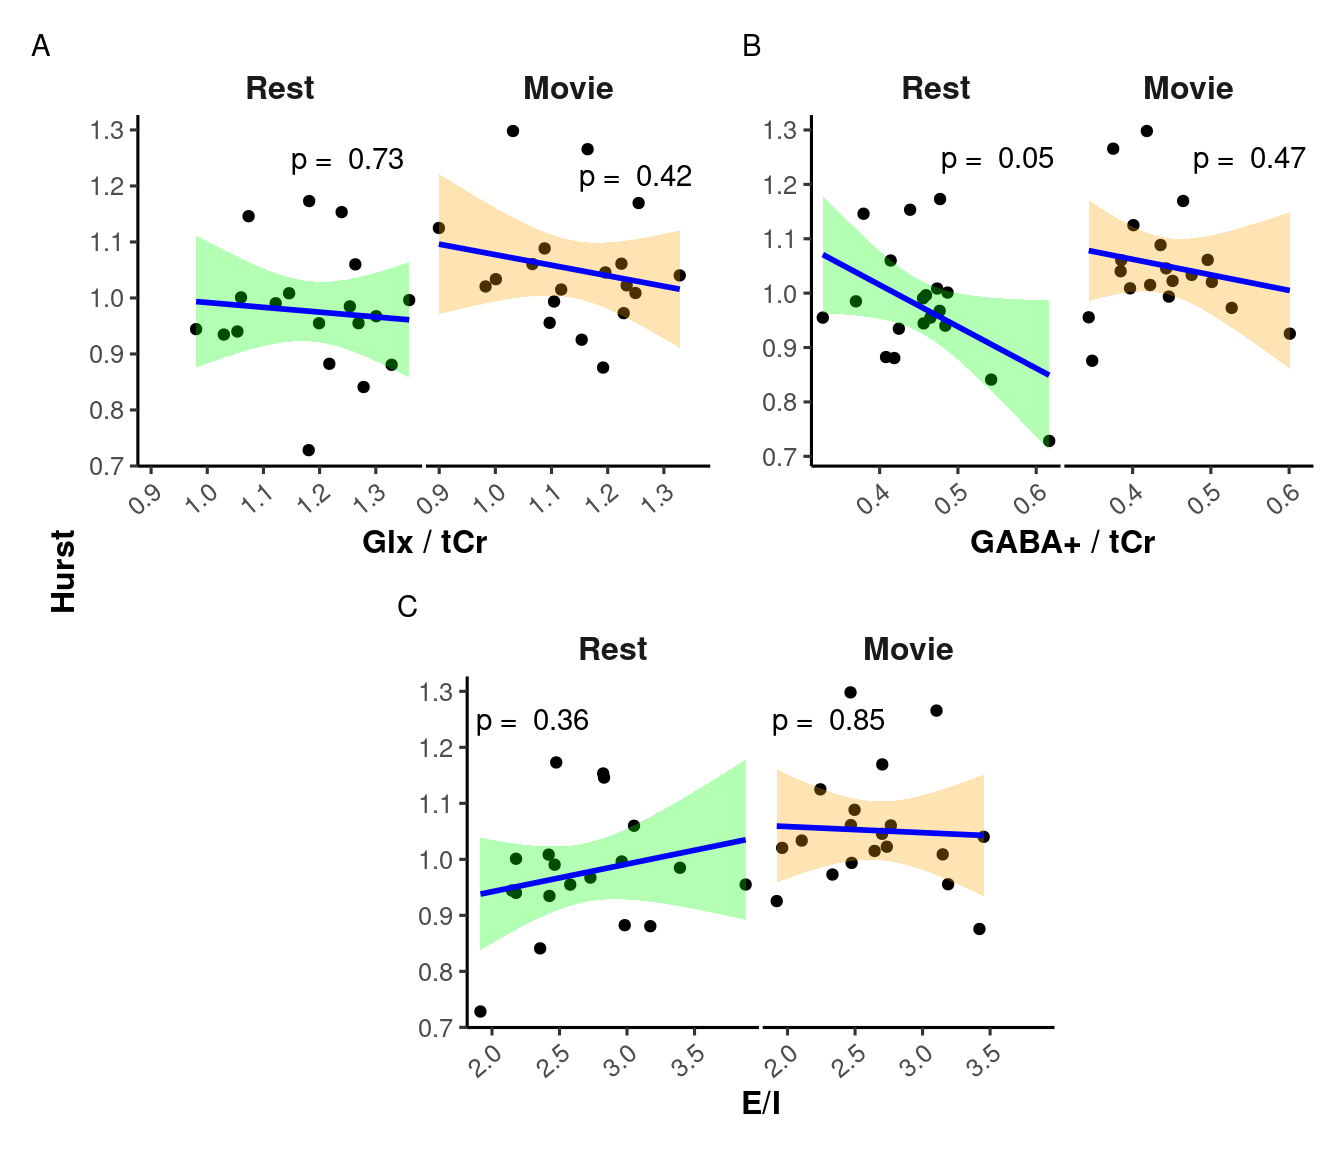

In [ ]:
layout <- "
AABB
#CC#
"
glu_hurst_plot + gaba_hurst_plot + ei_hurst_plot + plot_layout(design=layout, guides = 'collect', axes = 'collect', axis_titles = 'collect') + plot_annotation(tag_levels = 'A') & theme(plot.tag = element_text(size = 11))

# Discussion

We report here the first in vivo human study of the E/I-H relationship. An increase in H was observed during movie-watching as compared to rest, indicating a decrease in BOLD signalling complexity in response to visual stimuli. However, no difference in E/I was observed between conditions, nor was H found to be related to E/I during either movie-watching or rest. Our finding that H increases during movie-watching compared to rest is consistent with a previous study by our lab, which found that H increases in the visual network during movie-watching \[@campbellFractalBasedAnalysisFMRI2022\]. However, previous studies have observed a task-dependent H decrease using highly-structured, active tasks requiring patient input \[@heScaleFreePropertiesFunctional2011; @churchillSuppressionScalefreeFMRI2016; @ciuciuInterplayFunctionalConnectivity2014; @barnesEndogenousHumanBrain2009\]. The results of our study in combination with our lab’s previous study \[@campbellFractalBasedAnalysisFMRI2022\], suggest that the naturalistic, passive task of movie-watching induces a different effect on H than more structured tasks. This is in line with literature suggesting that distinct neural responses and BOLD signal characteristics are observed in conventional, active visual tasks compared to naturalistic and passive visual stimuli \[@campbellFractalBasedAnalysisFMRI2022; @hassonReliabilityCorticalActivity2010\].

It may also be that richer scaling properties (higher H) during movie-watching comes about to support the continuous perception of visual stimuli during movie-watching \[@campbellFractalBasedAnalysisFMRI2022\]. Moreover, task-induced H changes have been observed to be dependent on task complexity and novelty \[@churchillSuppressionScalefreeFMRI2016\]. Given this finding, it seems reasonable to suggest that differences in task complexity and novelty may account for discrepancies in task-induced H changes.

We found no task-induced change in GABA+. This finding is consistent with a large meta-analytic review which pooled the results of 49 MRS studies \[@pasantaFunctionalMRSStudies2023\]. They too reported no task-dependent GABA change in the visual cortex. This may due to the technical difficulties of capturing GABA levels using MRS at 3T, owing to its low concentration in the brain as well as signal overlap with higher abundance metabolites \[@pasantaFunctionalMRSStudies2023\]. However, several studies have successfully reported changes in GABA at 3T using different paradigms / regions (for example: \[@floyer-leaRapidModulationGABA2006; @sampaio-baptistaChangesFunctionalConnectivity2015; @staggRoleGABAHuman2011\]; see @pasantaFunctionalMRSStudies2023 for more).

We also found no change in Glx between conditions. This is somewhat consistent with the literature – while a meta-analysis of recent Glu/Glx studies has reported a small task-induced increase in Glu/Glx in the visual cortex, this finding was non-specific to visual stimuli, including pain, learning, and motor tasks \[@pasantaFunctionalMRSStudies2023\]. It is also true that a large number of the studies included were conducted at 7T and thus have greater sensitivity to detect changes in Glu/Glx than the present study. Like GABA, glutamate is difficult to capture due to its similar chemical structure and signal overlaps with other metabolites.

Given that no difference was observed for either glutamate or GABA between conditions, it is unsurprising that E/I does not change either.

In terms of the central question of our research, we did not find a relationship between H and E/I during either movie-watching or rest. This is not entirely surprising given the large disparity of existing findings in this regard, especially with regard to the directionality and linearity of the proposed E/I-Hurst relationship \[@liangExcitationInhibitionBalance2024; @poilCriticalStateDynamicsAvalanches2012; @lombardiBalanceExcitationInhibition2017; @baumgartenCriticalExcitationinhibitionBalance2019; @bruiningMeasurementExcitationinhibitionRatio2020; @trakoshisIntrinsicExcitationinhibitionImbalance; @gaoInferringSynapticExcitation2017\]. The heterogeneity across these E/I-Hurst studies highlights the challenges of studying this phenomenon as well as the complexity of any potential relationship between these two metrics. It may be that, given the heterogeneity of these studies in combination with our data, an E/I-Hurst relationship — should it exist — is perhaps more complex than initially thought, and may depend in part on how the data is collected.

Another reason we may not have found a relationship between E/I and H is that we sampled too narrow a range of profiles in terms of E/I and Hurst. Because our study included only healthy adults, it is possible that the participants did not show enough range in E/I and Hurst values to see a relationship. It is also possible that while an E/I-Hurst relationship exists, it is not observed within the visual cortex. This theory seems plausible given that MRS studies of disrupted E/I, mostly conducted within the context of adult autism spectrum disorder, have found changes in E/I within other brain regions such as the anterior cingulate cortex (ACC), frontal lobe, or temporal lobe \[@ajramContribution1HMagnetic2019\]. Moreover, findings with reference to changes in excitatory or inhibitory neurotransmitters within the visual cortex tend to be difficult to capture, perhaps indicating that E/I shows less changes in this region \[@pasantaFunctionalMRSStudies2023\].

## Limitations

There are two key limitations to our study which should be acknowledged. First is the small sample size. As this was a first-attempt pilot study, only 26 participants were initially scanned. Once individuals were excluded for poor MRI quality, only 19 participants’ data were analyzed. With such a small sample size, it is difficult to make conclusions about a concept as complex as the E/I-Hurst relationship as well as its relations to criticality. The other key limitation of our study is the low sensitivity of our MRS method — as a result, it is hard to conclusively state whether we found no E/I-Hurst link because it truly does not exist or if we found no E/I-Hurst link because our methods lacked the sensitivity to detect it. A possible solution would be to conduct a future study using ultra-high-field 7T MRI as opposed to conventional 3T MRI.

# Conclusion

In conclusion, our findings do not support a relationship between H and E/I in the visual cortex either during rest or during movie-watching at 3T in humans. In addition, while we found a task-related change in H, we did not find any changes in glutamate, GABA, or E/I between movie and rest. Comparing our findings to the broader literature, E/I balance may be too subtle to be detected with conventional MRS methods. With regards to the broader E/I-Hurst relationship, we similarly suggest that either this relationship is insufficiently captured with our methods, or that the relationship between these two variables may be more complex than originally envisaged—perhaps they are not directly related, but rather connected through other mediating variables in a non-linear fashion. To our knowledge, this is the first in vivo human study to test for this relationship. It is our hope that as the literature grows, more authors will examine this in vivo relationship with respect to other brain regions and using other methods, and will use the lessons learned in this study to inform their own. Hopefully then it will be possible to corroborate findings to probe the complex relationships that may exist with regards to H and E/I in the human brain.